In [1]:
!pip install ipykernel

Reading images from class directory: Bengin cases
Reading images from class directory: Malignant cases
Reading images from class directory: Normal cases
Epoch 1/80
52/52 ━━━━━━━━━━━━━━━━━━━━ 26s 424ms/step - accuracy: 0.4870 - loss: 1.9617 - val_accuracy: 0.5273 - val_loss: 0.9500
Epoch 2/80
52/52 ━━━━━━━━━━━━━━━━━━━━ 23s 438ms/step - accuracy: 0.6391 - loss: 1.0979 - val_accuracy: 0.5273 - val_loss: 0.9402
Epoch 3/80
52/52 ━━━━━━━━━━━━━━━━━━━━ 22s 420ms/step - accuracy: 0.6907 - loss: 0.7917 - val_accuracy: 0.5273 - val_loss: 0.9539
Epoch 4/80
52/52 ━━━━━━━━━━━━━━━━━━━━ 22s 432ms/step - accuracy: 0.7515 - loss: 0.6154 - val_accuracy: 0.5273 - val_loss: 0.9695
Epoch 5/80
52/52 ━━━━━━━━━━━━━━━━━━━━ 22s 420ms/step - accuracy: 0.7430 - loss: 0.6300 - val_accuracy: 0.5273 - val_loss: 0.9576
Epoch 6/80
52/52 ━━━━━━━━━━━━━━━━━━━━ 22s 428ms/step - accuracy: 0.7792 - loss: 0.5751 - val_accuracy: 0.5273 - val_loss: 0.9228
Epoch 7/80
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 409ms/step - accuracy: 0.7762 -

52/52 ━━━━━━━━━━━━━━━━━━━━ 23s 433ms/step - accuracy: 0.9930 - loss: 0.0410 - val_accuracy: 0.9891 - val_loss: 0.0976
Epoch 51/80
52/52 ━━━━━━━━━━━━━━━━━━━━ 22s 431ms/step - accuracy: 0.9807 - loss: 0.0523 - val_accuracy: 0.9636 - val_loss: 0.1641
Epoch 52/80
52/52 ━━━━━━━━━━━━━━━━━━━━ 23s 432ms/step - accuracy: 0.9852 - loss: 0.0453 - val_accuracy: 0.9891 - val_loss: 0.1020
Epoch 53/80
52/52 ━━━━━━━━━━━━━━━━━━━━ 23s 439ms/step - accuracy: 0.9781 - loss: 0.0704 - val_accuracy: 0.9745 - val_loss: 0.1063
Epoch 54/80
52/52 ━━━━━━━━━━━━━━━━━━━━ 23s 437ms/step - accuracy: 0.9834 - loss: 0.0457 - val_accuracy: 0.9818 - val_loss: 0.1089
Epoch 55/80
52/52 ━━━━━━━━━━━━━━━━━━━━ 23s 441ms/step - accuracy: 0.9850 - loss: 0.0547 - val_accuracy: 0.9818 - val_loss: 0.0990
Epoch 56/80
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 411ms/step - accuracy: 0.9824 - loss: 0.0510 - val_accuracy: 0.9855 - val_loss: 0.0822
Epoch 57/80
52/52 ━━━━━━━━━━━━━━━━━━━━ 22s 414ms/step - accuracy: 0.9924 - loss: 0.0476 - val_accuracy

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.9968 - loss: 0.1098
Test Loss: 0.11807313561439514, Test Accuracy: 0.9927272796630859


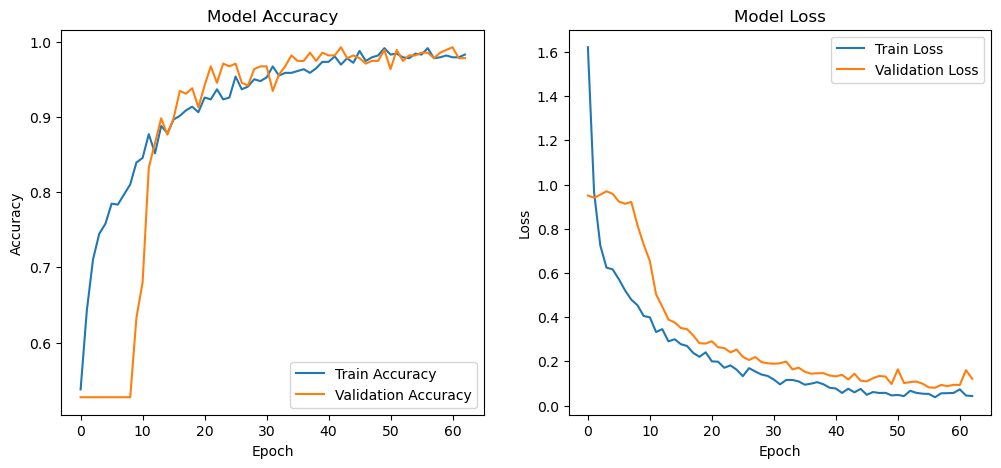

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step
Normalized confusion matrix


<Figure size 800x600 with 0 Axes>

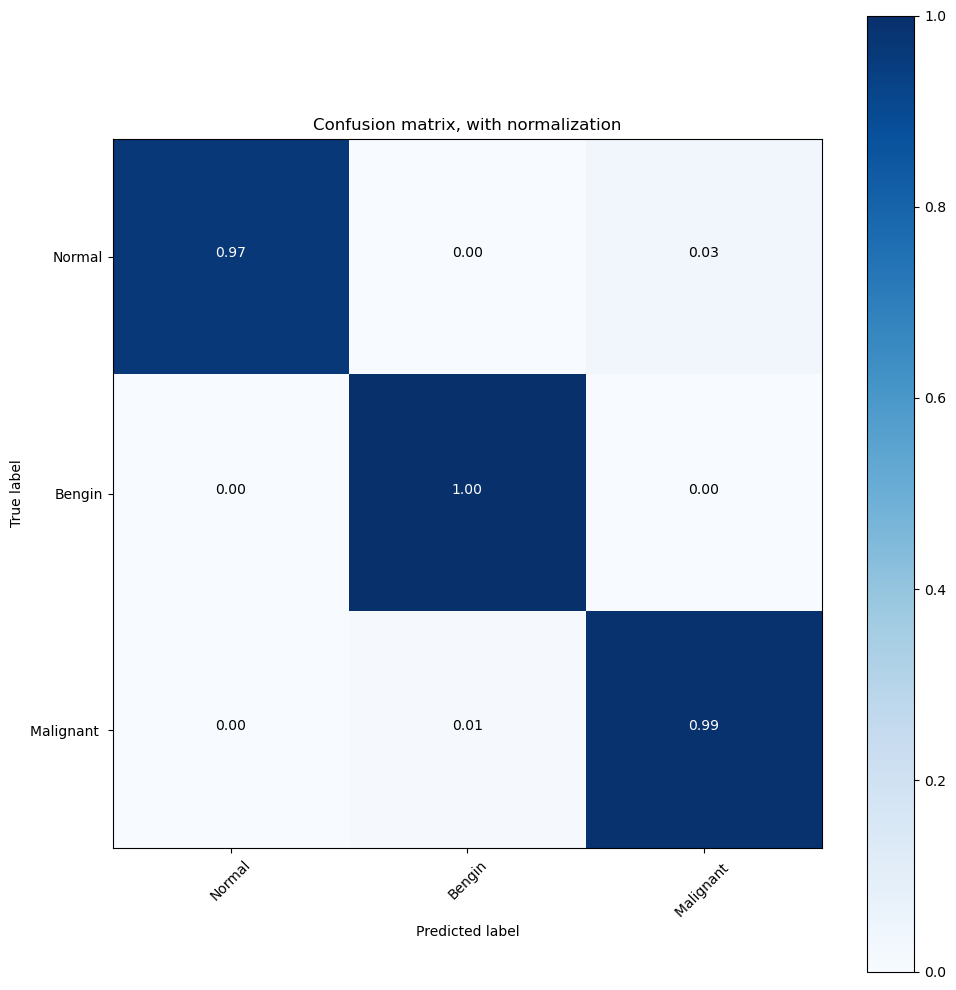

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.99      1.00      1.00       145
           2       0.99      0.99      0.99       101

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

[[ 28   0   1]
 [  0 145   0]
 [  0   1 100]]


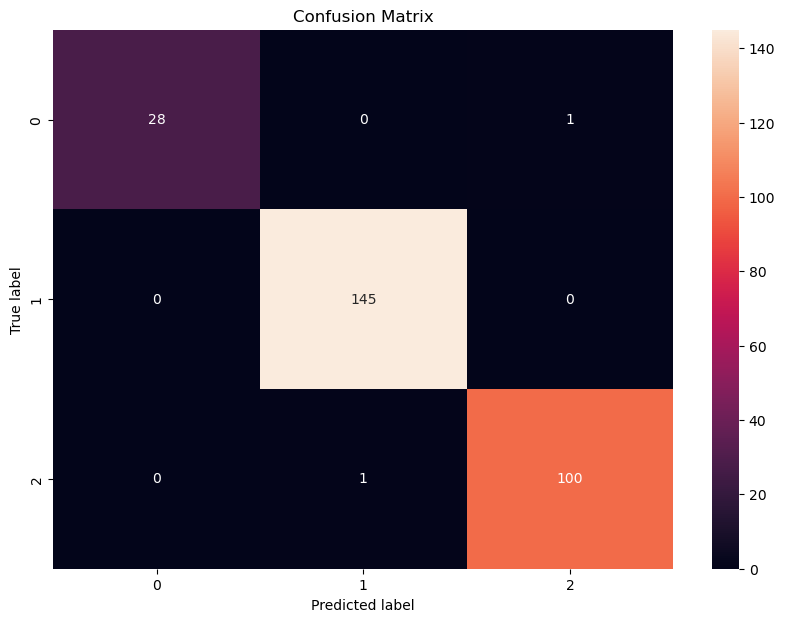

In [4]:
import os
import numpy as np
from PIL import Image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout,Flatten, Dense, BatchNormalization, ReLU, Add
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import EarlyStopping, ModelCheckpoint
# Parameters
dataset_path = 'The IQ-OTHNCCD lung cancer dataset/'  # Replace with the path to your dataset
# Parameters
#dataset_path = '/content/drive/MyDrive/The IQ-OTHNCCD lung cancer dataset'  # Replace with the path to your dataset
input_shape = (128, 128, 3)
num_classes = 3  # Normal, Benign, Malignant

# Load and preprocess images
images = []
labels = []
class_names = ['Normal','Malignant', 'Benign']  # Replace with your actual class names if different
class_mapping = {class_name: index for index, class_name in enumerate(class_names)}

for class_dir in os.listdir(dataset_path):
    class_dir_path = os.path.join(dataset_path, class_dir)
    if os.path.isdir(class_dir_path):
        print(f"Reading images from class directory: {class_dir}")
        for image_file in os.listdir(class_dir_path):
            image_path = os.path.join(class_dir_path, image_file)
            try:
                image = Image.open(image_path)
                image = image.resize(input_shape[:2])
                image = np.array(image)
                if image.shape == input_shape:
                    images.append(image)
                    labels.append(class_dir)  # Assuming folder names are class labels
                else:
                    print(f"Image {image_path} is skipped due to shape mismatch.")
            except Exception as e:
                print(f"Error reading image {image_path}: {e}")


images = np.array(images, dtype=np.float32) / 255.0  # Normalize image data to 0-1
# Convert labels to categorical
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)
labels = to_categorical(integer_encoded, num_classes=num_classes)


# Shuffle the dataset
shuffled_indices = np.arange(images.shape[0])
np.random.shuffle(shuffled_indices)
images = images[shuffled_indices]
labels = labels[shuffled_indices]

# Split data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.25, random_state=42)


# Define the CNN Model with 11 layers including a residual block
inputs = Input(shape=input_shape)

# First layer
x = Conv2D(64, (3,3), padding='same')(inputs)
x = BatchNormalization()(x)
x = ReLU()(x)
x = MaxPooling2D((2, 2))(x)

# Residual block
shortcut = x
x = Conv2D(64, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Conv2D(64, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Add()([x, shortcut])
x = ReLU()(x)
x = MaxPooling2D((2, 2))(x)
# Additional layers with Dropout


x = Conv2D(64, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Dropout(0.5)(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Dropout(0.5)(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(num_classes, activation='softmax')(x)

# Create model
model = Model(inputs, x)
opt = Adam(learning_rate=0.0001)
# Compile the model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Split data into training and testing sets

callbacks = [EarlyStopping(    monitor="val_accuracy",
    patience=20,
    verbose=0,
    mode="max",
    baseline=None,
    restore_best_weights=True,),
             ModelCheckpoint(filepath='model.h5.keras', monitor='val_accuracy', save_best_only=True)]

# Train the model and save the history
history = model.fit(train_images, train_labels,callbacks=callbacks, batch_size=16, epochs=80, validation_data=(test_images, test_labels))
model.save('model.h5')
# Evaluate the model
loss, accuracy = model.evaluate(test_images, test_labels)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Plot the accuracy and loss curves
plt.figure(figsize=(12, 5))

# Accuracy curve
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Loss curve
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.show()

# Predict the labels for test dataset


# Predict the labels for test dataset
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot normalized confusion matrix
plt.figure(figsize=(8, 6))
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(true_classes, predicted_classes)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
fig=plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['Normal', 'Bengin', 'Malignant '],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()
fig.savefig('confusionmodel.jpg', bbox_inches='tight', dpi=150)
print(classification_report(true_classes, predicted_classes))
print(confusion_matrix(true_classes, predicted_classes))

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()